In [1]:
%cd ..

/mnt/ceph/users/zzhang/CRISPR_pred/crispr_kinn


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# to generate bh_res (bayes hierarchical model results), see notebook 08-multiState.ipynb
with open("./outputs/analysis/bh_res.pkl", "rb") as f:
    bh_res = pickle.load(f)

In [4]:
bh_res.keys()

dict_keys(['finkelstein-gRNA1', 'finkelstein-gRNA2', 'uniform-4-gRNA1', 'uniform-4-gRNA2', 'uniform-5-gRNA1', 'uniform-5-gRNA2', 'uniform-6-gRNA1', 'uniform-6-gRNA2'])

In [5]:
def plot_line_interval(mu, sigma, lw_norm=None, lw_multiplier=0.4,  ax=None, col='k', verbose=False):
    fontsize=15
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(5,5))
    offset = 0.25
    if lw_norm is None:
        lw_norm = np.diagonal(sigma).sum()
    yticks = []
    k = 1
    s = 1
    max_lw = 0
    starts = []
    ends = []
    for i in range(0, len(mu), 3):
        k += 1
        start = mu[i]
        end = mu[i] + mu[i+1]
        starts.append(start); ends.append(end)
        ks = mu[i+2]
        tot_var = sum([sigma[i,i], sigma[i+1, i+1], sigma[i+2, i+2]])
        if verbose: print(start, end, ks, tot_var)
        #ax.text(start+1, -i+offset, "k%i (%.2f)"%(k, ks), fontsize=12)
        ax.text(start+1, -i+offset, "k%i"%(k), fontsize=fontsize)
        # use linewidth to present the variance/reliability for this line interval
        this_lw = (1-(tot_var/lw_norm))*lw_multiplier
        if this_lw > max_lw:
            max_lw = this_lw
        if k%2:
            ax.plot((start, end), (-i,-i), lw=this_lw, color=col, ls='--')
            ranges = [min(starts), min(max(ends), 25)]
            yticks.append([-i+2, 'State %i\n(%.1f-%.1f)'%(s, ranges[0], ranges[1])])
            s += 1
            starts = []; ends = []

        else:
            ax.plot((start, end), (-i,-i), lw=this_lw, color=col)
    # plot last rate w/o reverse react
    ranges = [min(starts), min(max(ends), 25)]
    yticks.append([-i, 'State %i\n(%.1f-%.1f)'%(s, ranges[0], ranges[1])])

    # plot first rate for PAM        
    ax.text(1, 6+offset, "k0", fontsize=fontsize)
    ax.plot((0,3), (6,6), lw=2., color=col)
    ax.text(1, 3+offset, "k1", fontsize=fontsize)
    ax.plot((0,3), (3,3), lw=2., color=col, ls='--')
    yticks.append([4, 'State 0\n(0-3)'])
    
    ax.set_xlim(0, 25)
    ax.set_xlabel("gRNA")
    ax.set_yticks([a[0] for a in yticks])
    ax.set_yticklabels([a[1] for a in yticks], fontsize=fontsize)
    return ax

<Figure size 432x288 with 0 Axes>

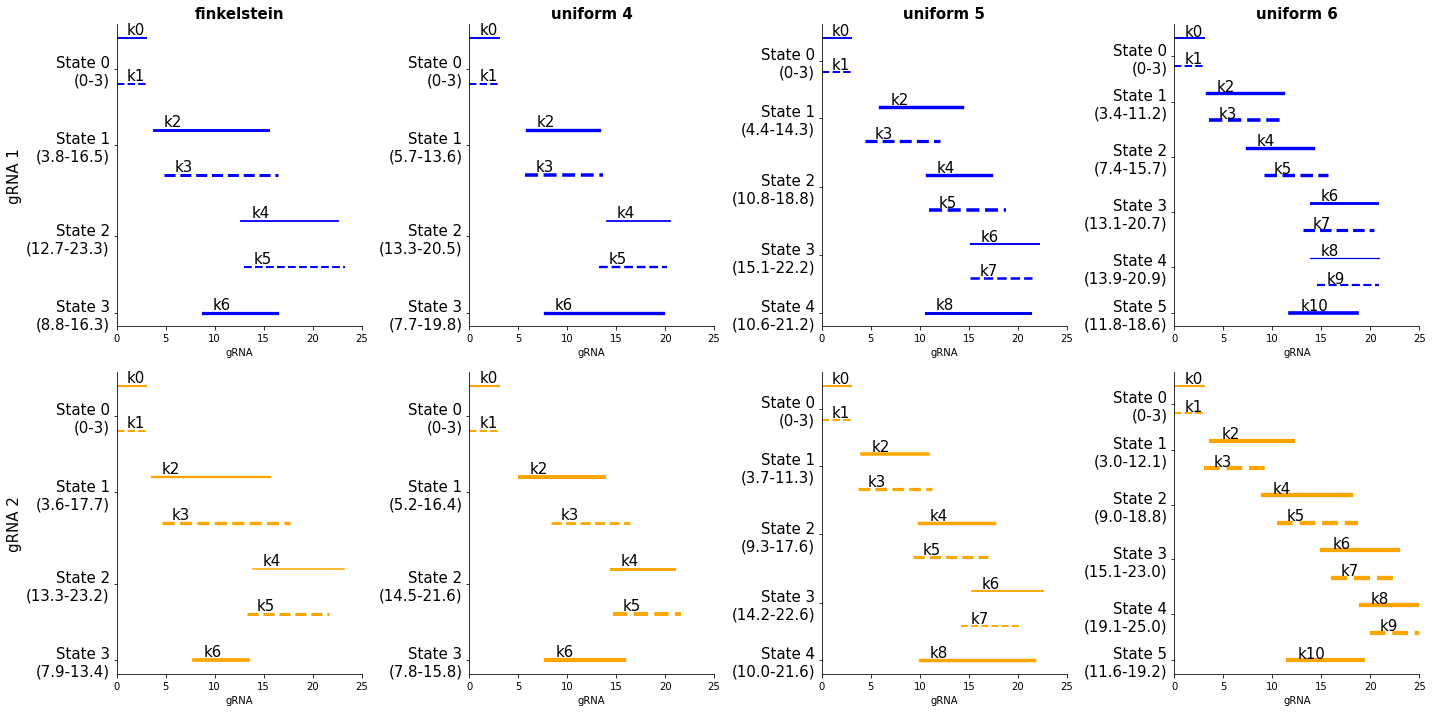

In [6]:
plt.clf()
res = bh_res
fig, axs = plt.subplots(2, len(res)//2, figsize=(5*len(res)//2, 10))
i = 0
j = 0
lw_norm = 20
lw_multiplier = 5
for config in res:
    mu = res[config][0]
    ax = axs[j,i]
    plot_line_interval(mu, sigma=res[config][1], ax=ax, lw_norm=lw_norm, lw_multiplier=lw_multiplier, col='orange' if j%2 else 'blue')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i==0:
        ax.set_ylabel('gRNA %i' % (j+1), fontsize=15)
    if j==1:
        j=0; i+=1
    else:
        ax.set_title(' '.join(config.split('-')[:-1]), fontsize=15, fontweight="bold")
        j+=1
fig.tight_layout()

[]

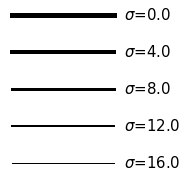

In [7]:
fig, ax = plt.subplots(1,1, figsize=(2,3))
for lw in range(1, 6):
    #ax.axhline(y=lw, xmin=0, xmax=2, color='k', lw=lw)
    ax.plot((0, 2), (lw, lw), color='k', lw=lw)
    sigma = (1-(lw/lw_multiplier)) * lw_norm
    ax.text(2.2, lw, r"$\sigma$=%.1f"%(sigma), fontsize=15, va='center')
#ax.set_xlim(-1, 5)
#ax.set_ylim(0, 7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Sep 09 2022

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.22.0

numpy     : 1.21.6
matplotlib: 3.4.3

Watermark: 2.3.1

